#             <center>                                                                   DSA and OOPS​

# <center> CRYPTOCURRENCY TRANSACTION LEDGER

## INTRODUCTION

**WHAT IS CRYPTOCURRENCY TRANSACTION LEDGER?**

A cryptocurrency transaction ledger is a digital record that stores all transactions made within a cryptocurrency network. It ensures that transactions are securely recorded and verified. In the context of cryptocurrencies, a ledger is a database or a list of every transaction that has ever taken place on the network. 
Ledger take care of Transaction Recording, Account Balances, and Immutability.

**WHY IS SECURE TRANSACTION RECORDING IMPORTANT?**

Secure transaction recording is crucial to prevent fraud, unauthorized modifications, and double spending in financial systems. It ensures data integrity by maintaining an immutable record of transactions, making it tamper-proof and transparent. This enhances trust and reliability, especially in decentralized systems like blockchain.

**HOW DOES BLOCKCHAIN PRINCIPLES APPLY?**

Blockchain principles apply to this project by ensuring that each transaction is securely linked to the previous one using cryptographic hashing. Each transaction node stores a hash of the previous transaction, creating a chain-like structure similar to a blockchain. This ensures data integrity, as any modification to a past transaction would alter its hash, breaking the chain and making tampering detectable. By using hashing and linking transactions sequentially, the ledger maintains transparency, security, and immutability, key features of blockchain technology.

The purpose of this project is to develop a secure and efficient transaction ledger using a linked list-based structure. Each transaction is stored as a node in the linked list, ensuring a sequential record of financial exchanges. To enhance security and integrity, cryptographic hashing is applied to verify each transaction by storing the hash of the previous transaction within the current node. This prevents tampering, as any modification to past transactions would break the hash chain. By integrating these techniques, the project aims to create a simple yet secure ledger that mimics blockchain technology, ensuring transparency, immutability, and reliability in transaction history management.




## BLOCKCHAIN EXAMPLE

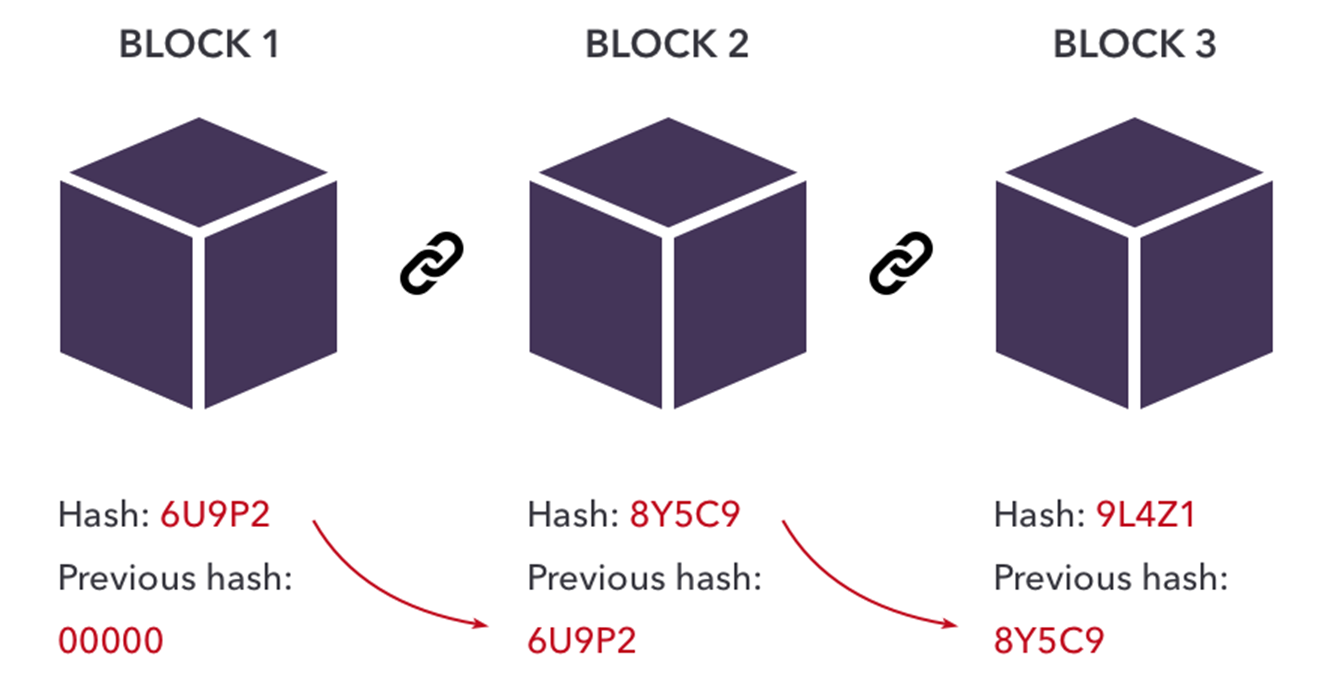

## OBJECTIVES

* Linked lists provide a sequential structure that can easily store and link transactions in order.

* Each transaction is linked to the previous transaction, ensuring a chronological order of events.

* Unlike traditional data structures, linked lists are naturally suited to represent chains of data (such as transactions), making them a perfect fit for blockchain-like applications.

    
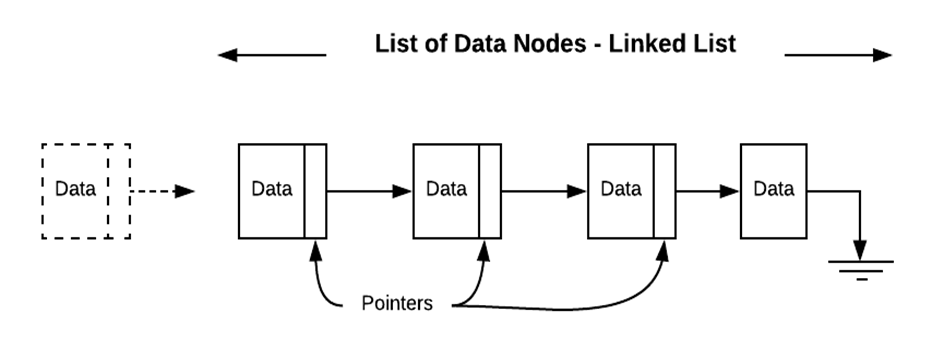  <center>

* Implement Blockchain-Like Verification (Hashing for Integrity)

* Apply cryptographic hashing to ensure data integrity.

* Each transaction will include a hash of the previous block, making any modification to past transactions easily detectable, ensuring a tamper-proof ledger.

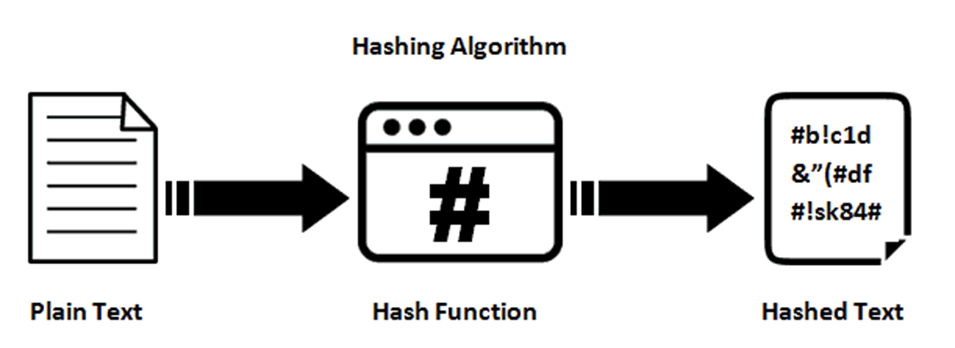

## SYSTEM ARCHITECTURE

1. Every node contains:

      * Transaction Data (Sender, Receiver, Amount, Timestamp)

      * Previous Hash (Hash of the previous transaction) 

      * Current Hash (Generated using cryptographic hashing) 

      * Pointer to the Next Node (Links to the next transaction)


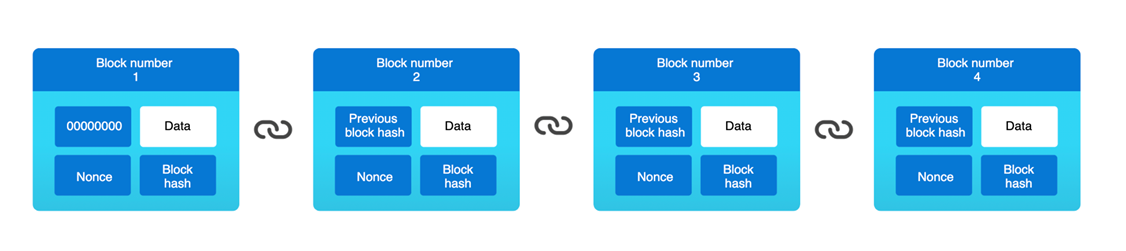


2. Process Flow:
      * New Transaction is Created (User inputs Sender, Receiver, and Amount)

      * Retrieve the Previous Hash (From the last node in the list)

      * Generate a New Hash (Using transaction details and previous hash)

      * Store the Transaction in a New Node (Appending it to the linked list)
      
      * Verify the Ledger (Checking hash consistency across all nodes)


## DATA STRUCTURE USED

**LINKED LIST :** 

Linked List is a linear data structure, in which elements are not stored at a contiguous location, rather they are linked using pointers. Linked List forms a series of connected nodes, where each node stores the data and the address of the next node.A blockchain is like a linked list where each block is connected to the next.Each block stores transaction details and the link to the previous block(prev hash).so they are connected in order.
This ensures that all transactions are stored in a sequence and cannot be changed.

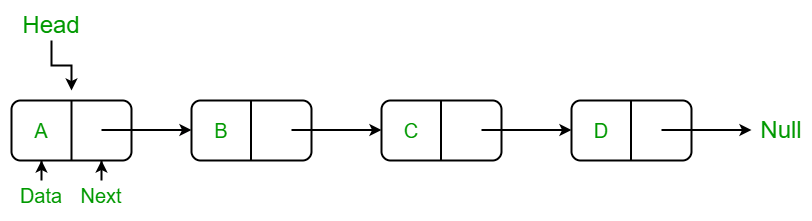

​**HASHING :**

Hashing is a process of scrambling a piece of information or data beyond recogination. we use hash function to convert input into hash digest.these function are irresversible by design.The hash value/digest,will always be same for similar inputs.

SHA 256(secured hash algorithm)-is a popular hashing algorithm used in blockchain. It is a cryptographic hash function that takes an input and produces a fixed 256-bit (64-character) hash. It follows a detailed process of bitwise operations, logical functions, and modular arithmetic. SHA-256 creates a unique code for every block. Even a tiny change in data creates a completely different hash.Blockchain uses hashing to keep transactions secure and unchangeable.SHA-256 uses 256-bit hashes, making brute-force attacks exponentially harder than SHA-1 and MD5.

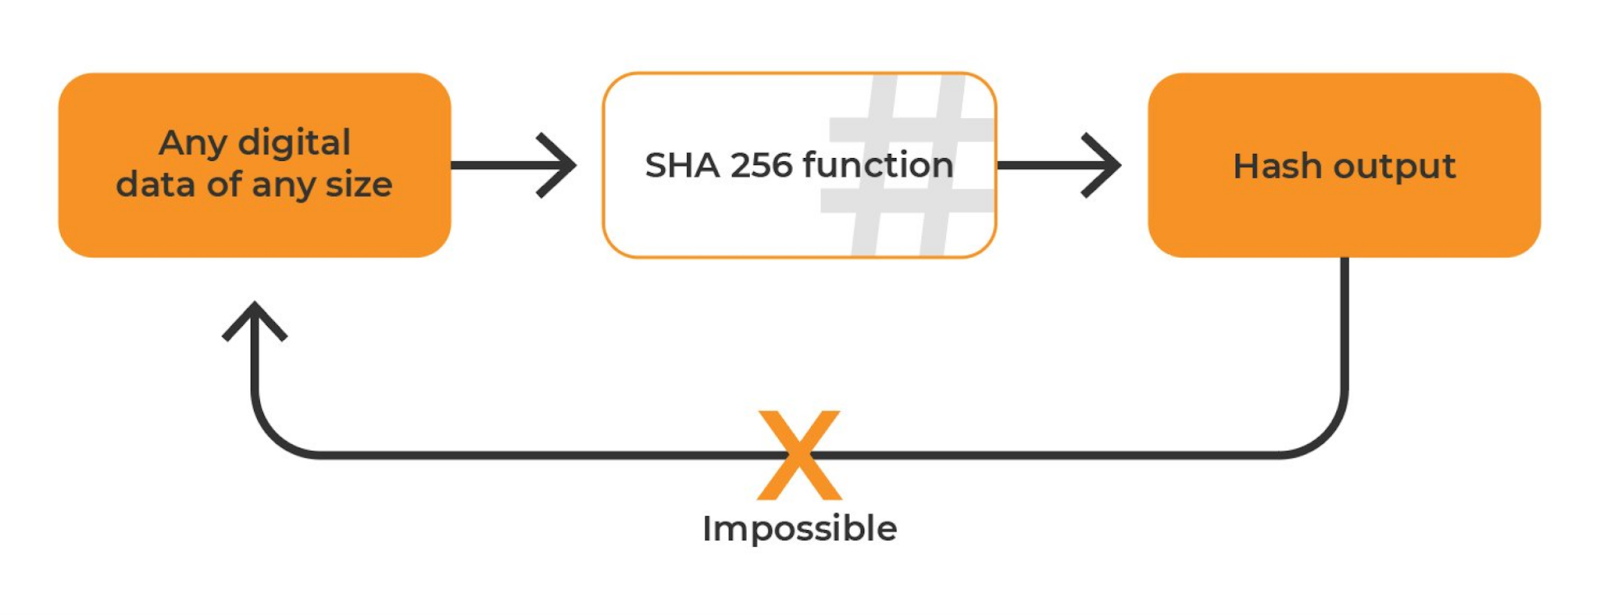

​

## Code Structure and Design


1. **Transaction:**
    * Holds sender, receiver, amount, timestamp.
    * Implements __str__() for easy printing.

2. **Node class**
    * Stores the transaction data.
    * Stores previous hash (ensuring transaction immutability).
    * Computes current hash using SHA-256.
    * Has a pointer to the next node in the linked list.

3. **TransactionLedger Class**
    * Implements a singly linked list structure.
    * Stores head (first node) and tail (last node) for efficient insertion.
    * Provides methods for:
        - add_transaction() → Adds transactions while maintaining hash integrity.
        - verify_chain() → Ensures each node's previous hash matches the previous node's hash.
        - display_ledger() → Prints all transactions with their hashes.



In [ ]:
class Transaction:
    def __init__(self, sender, receiver, amount):
        self.sender = sender
        self.receiver = receiver
        self.amount = amount
        self.timestamp = time.time()  #used to record the time
    
    def __str__(self):
        return f"Sender: {self.sender}, Receiver: {self.receiver}, Amount: {self.amount}, Timestamp: {self.timestamp}"

In [ ]:
class Node:
    def __init__(self, transaction, previous_hash=""):
        self.transaction = transaction
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash()
        self.next = None  # It is a pointer which point to the next node.
    
    def calculate_hash(self):
        data = f"{self.transaction}{self.previous_hash}{self.transaction.timestamp}"
        return hashlib.sha256(data.encode()).hexdigest()


In [ ]:
class TransactionLedger:
    def __init__(self):
        self.head = None  # Point to the start of the linked list
        self.tail = None  # Point to the end of the linked list
    
    def add_transaction(self, sender, receiver, amount):
        transaction = Transaction(sender, receiver, amount)
        previous_hash = self.tail.hash if self.tail else "0"
        new_node = Node(transaction, previous_hash)
        
        #to add the node to the linked list
        if self.head is None:
            self.head = new_node
        else:
            self.tail.next = new_node
        self.tail = new_node
        
        print(f"Transaction added:\n{transaction}")
    
    def verify_chain(self):
        current = self.head
        while current and current.next:
            if current.hash != current.next.previous_hash:
                return False  # Chain is broken
            current = current.next
        return True
    
    def display_ledger(self):
        current = self.head
        while current:
            print(f"Transaction: {current.transaction}\nHash: {current.hash}\n")
            current = current.next


## MANGODB DATABASE

* Linked list stores transactions temporarily in memory, meaning:
    * Transactions disappear when the program stops.
    * Searching for past transactions is slow since we must traverse the linked list.
    * The ledger is not scalable for large transaction volumes.

* By integrating a database (like MongoDB), you can:
    * Store transactions permanently (even after restarting the system).
    * Quickly retrieve past transactions using database queries.
    * Scale the ledger efficiently for thousands/millions of transactions.


<div class="relative overflow-hidden shadow-md rounded-lg">
    <table class="table-fixed w-full text-left">
        <thead class="uppercase bg-[#6b7280] text-[#e5e7eb]" style="background-color: #6b7280; color: #e5e7eb;">
            <tr>
                <td contenteditable="true" class="py-1 border border-gray-200 text-center  p-4">Issue</td>
                <td contenteditable="true" class="py-1 border border-gray-200 text-center  p-4">Current Linked List Approach</td>
                <td contenteditable="true" class="py-1 border border-gray-200 text-center  p-4">MongoDB Integration</td>
            </tr>
        </thead>
        <tbody class="bg-white text-gray-500 bg-[#FFFFFF] text-[#6b7280]" style="background-color: #FFFFFF; color: #6b7280;">
            <tr class=" py-5">
                <td contenteditable="true" class=" py-5 border border-gray-200 text-center  p-4">Data Storage</td>
                <td contenteditable="true" class=" py-5 border border-gray-200 text-center  p-4">Stored in memory (lost on restart)</td>
                <td contenteditable="true" class=" py-5 border border-gray-200 text-center  p-4">Stored persistently in a database</td>
            </tr>
            <tr class=" py-5">
                <td contenteditable="true" class=" py-5 border border-gray-200 text-center  p-4">Retrieval Speed</td>
                <td contenteditable="true" class=" py-5 border border-gray-200 text-center  p-4"><code>O(n)</code>, slow for large data</td>
                <td contenteditable="true" class=" py-5 border border-gray-200 text-center  p-4"><code>O(1)</code> with indexes, very fast</td>
            </tr>
            <tr class=" py-5">
                <td contenteditable="true" class=" py-5 border border-gray-200 text-center  p-4">Scalability</td>
                <td contenteditable="true" class=" py-5 border border-gray-200 text-center  p-4">Memory-limited</td>
                <td contenteditable="true" class=" py-5 border border-gray-200 text-center  p-4">Can handle millions of transactions</td>
            </tr>
            <tr class=" py-5">
                <td contenteditable="true" class=" py-5 border border-gray-200 text-center  p-4">Search Capability</td>
                <td contenteditable="true" class=" py-5 border border-gray-200 text-center  p-4">Linear search only</td>
                <td contenteditable="true" class=" py-5 border border-gray-200 text-center  p-4">Indexed queries for instant search</td>
            </tr>
        </tbody>
    </table>
</div>



In [ ]:

class TransactionDatabase:
    def save_transaction(self, sender, receiver, amount, hash, previous_hash):
        transaction_data = {
            "sender": sender,
            "receiver": receiver,
            "amount": amount,
            "timestamp": time.time(),
            "hash": hash,
            "previous_hash": previous_hash
        }
        collection.insert_one(transaction_data)  # Save to MongoDB
        print("Transaction saved to database.")


## DATA PREPARATION

1. Transaction Input:
    * Ensure each transaction contains:
        - Sender: The party sending funds.
        - Receiver: The party receiving funds.
        - Amount: The transaction amount.
        - Timestamp: Auto-generated when the transaction is created.

2. Data Storage Format:
    * In Linked List each node contains :
        - Transaction (data object).
        - Hash (unique for the node).
        - Previous Hash (link to the previous node).
    * In Database:
        - Store the same information as columns:
          id, sender, receiver, amount, timestamp, hash, previous_hash.

3. Data Validation:
    * Ensure valid data before adding a transaction:
        - Positive amount.
        - Non-empty sender and receiver.

4. Integration Between Structures:
    * Linked List:
        - Adds the transaction in memory during runtime.
    * Database:
        - Saves the same transaction for long-term storage.


## LINKED LIST VS BLOCKCHAIN STRUCTURE

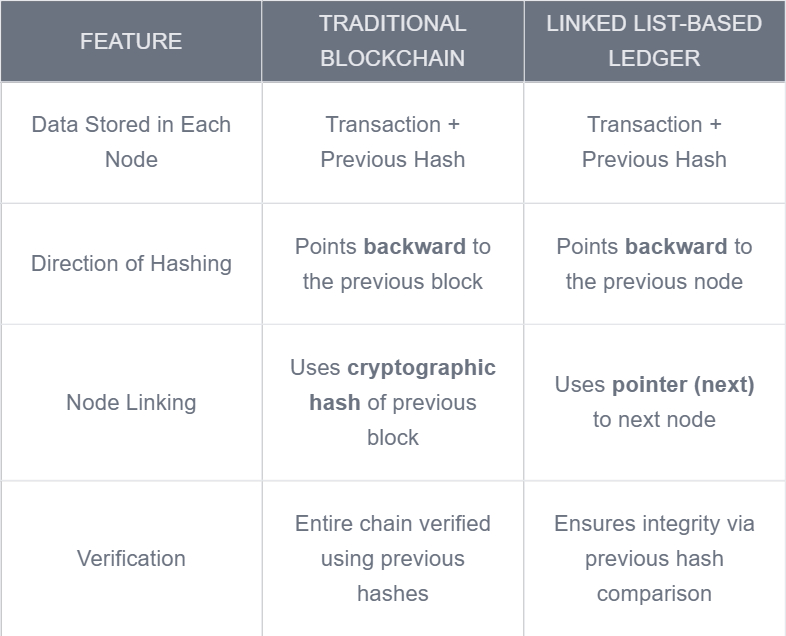

## ADVANTAGES

1. Immutability​ :Cryptocurrency ledgers, based on blockchain technology, are immutable. Once a transaction is recorded, it cannot be altered or deleted, ensuring transparency and security.​

2. Transparency​ :All transactions on a cryptocurrency ledger are public and auditable, promoting trust and accountability within the​ network.​

3. Decentralization​ : Cryptocurrency ledgers are designed for efficient and rapid transaction processing. With blockchain technology, transactions can be verified and added to the ledger quickly, enabling near-instantaneous transfers of digital assets.​ This efficiency makes cryptocurrencies well-suited for various applications, including financial transactions and supply chain management.​

## The Future Scope of Cryptocurrency and Hashing​
​

* Decentralized Finance (DeFi)​ :
    Cryptocurrency and hashing are fueling the growth of Decentralized Finance (DeFi), enabling new financial services and products with increased transparency and efficiency.​

* Metaverse and Web3 :​
    Cryptocurrency and hashing are playing a crucial role in the development of the metaverse and Web3, enabling secure digital identity, ownership, and transactions.​
* Enhanced Security​ :
    Cryptocurrency and hashing are also advancing security and privacy in various applications, from data storage to authentication systems.​
* Voting Systems :​
    In addition to enhancing security and privacy, cryptocurrency and hashing are also contributing to the advancements in digital voting systems. Using blockchain technology, voting processes can be made more transparent, secure, and tamper-proof, ensuring the integrity​
* current transaction ledger ensures integrity using hashing and a linked-list structure. However, you can further enhance it using AI/ML models to detect fake or fraudulent transactions before they are added to the ledger.



​
​
​

## TEAM MEMBERS

1. Jivites D    - 24020
2. Mehan        - 24031
3. Ramkumar K R - 24042
4. Sukanthan    - 24056